## Chi-Squared Analysis

### First Question: Did more women and children survived compare to men?

Dataset from Canvas (Titanic_Passenger_List.csv)

In [53]:
import pandas as pd
import matplotlib.pyplot as plt


passenger_df = pd.read_csv('../data/Titanic_Passengers.csv')
passenger_df.head()

,Name,Born,Died,Age,Gender,Passenger_Class,Lived_Died,Fare,Fare_decimal
0,"DEAN, Miss Elizabeth Gladys Millvina",1912.0,2009.0,0.166667,Female,3,lived,£20 11s 6d,20.58
1,"DANBOM, Master Gilbert Sigvard Emanuel",1911.0,1912.0,0.333333,Male,3,died,£14 8s,14.40
2,"TANNūS, Master As'ad",1911.0,1931.0,0.416667,Male,3,lived,£8 10s 4d,8.52
3,"PEACOCK, Master Albert Edward",1911.0,1912.0,0.583333,Male,3,died,£13 15s 6d,13.78
4,"RICHARDS, Master Sibley George",1911.0,1987.0,0.750000,Male,2,lived,£18 15s,18.75


- What kind of data is the `dependent` variable?
    - 
- What kind of data is the `Gender` (indep. variable)?
    - Nonimal 

Two Types:
    - `Ordinal` data.  Date that can be ordered
    - `Categorical/nominal`. Data that can not be ordered

In [54]:
# Margins = True will show the summery
contingency_table = pd.crosstab(passenger_df['Gender'], passenger_df['Lived_Died'])
# Excludes the last column and row Summary
# For plotting do not include the margins = True
print(contingency_table)

Lived_Died  died  lived
Gender                 
Female       143    339
Male         709    161


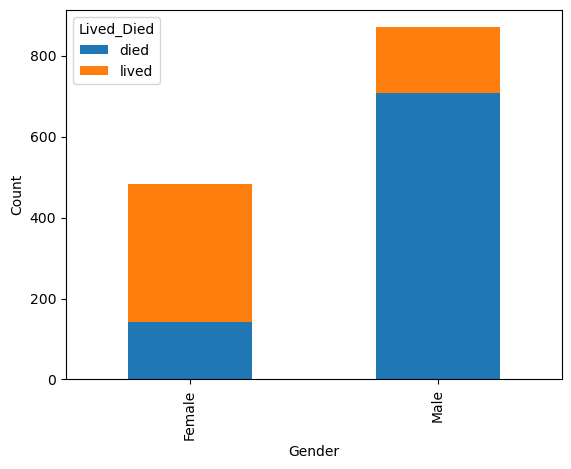

In [55]:
# Task: Create a Stacked bar char showing the number of passenger by gender
contingency_table.plot(kind='bar', stacked=True)
plt.ylabel('Count')
plt.show()

In [56]:
from scipy import stats # for chi2_contingency

print(stats.chi2_contingency(contingency_table)[0:3])
# You get 3 values back
# 1) Chi-Squared: The higher the chi-squared statistics, the less likelihood that the observed values were the result of pure chance
# 2) Target P-value: 
# 3) Degree of freedom: 1 degree if freedom. (r rows - 1) * ( r columns -1) = 1

(355.24355436145913, 3.0570688722545846e-79, 1)


## Chi-square Example: Was Age relevant?

In [57]:
# Check age column: Age column is the age they where during the titanic incident
# What about the null values
print(passenger_df.isnull().sum())

# Create the Bins
passenger_df['age_bins'] = pd.cut(x=passenger_df['Age'], bins= [0, 10, 20, 30, 40, 50, 60, 70, 80])
contingency_table = pd.crosstab(passenger_df['age_bins'], passenger_df['Lived_Died'])
print(contingency_table)
print(f'Chi2-Stats {stats.chi2_contingency(contingency_table)}')

Name                0
Born               24
Died               43
Age                24
Gender              0
Passenger_Class     0
Lived_Died          0
Fare               31
Fare_decimal       31
dtype: int64
Lived_Died  died  lived
age_bins               
(0, 10]       46     54
(10, 20]     156     71
(20, 30]     286    166
(30, 40]     158    107
(40, 50]     111     64
(50, 60]      40     30
(60, 70]      27      7
(70, 80]       5      0
Chi2-Stats Chi2ContingencyResult(statistic=24.465546982751874, pvalue=0.0009433264132943263, dof=7, expected_freq=array([[ 62.4246988 ,  37.5753012 ],
       [141.70406627,  85.29593373],
       [282.15963855, 169.84036145],
       [165.42545181,  99.57454819],
       [109.24322289,  65.75677711],
       [ 43.69728916,  26.30271084],
       [ 21.22439759,  12.77560241],
       [  3.12123494,   1.87876506]]))


C:\Users\gambl\AppData\Local\Temp\ipykernel_9112\831262973.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  passenger_df.groupby(['age_bins', 'Lived_Died']).size().unstack().plot(kind='hist', stacked=False)


<Axes: ylabel='Frequency'>

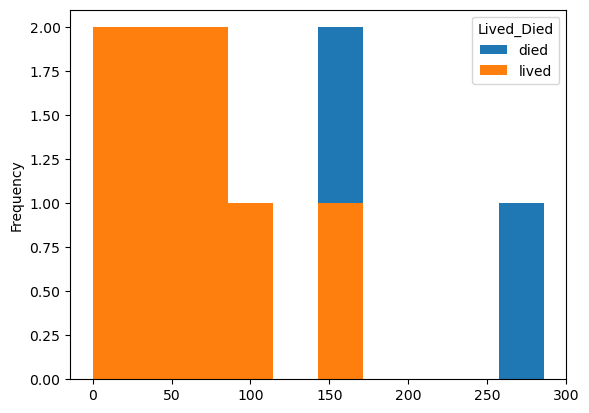

In [58]:
passenger_df.groupby(['age_bins', 'Lived_Died']).size().unstack().plot(kind='hist', stacked=False)

In [60]:
# Create a heatmap
import seaborn as sb
#passenger_df['age_bins'] = pd.cut(x=passenger_df['Age'], bins= [0, 10, 20, 30, 40, 50, 60, 70, 80])

# Use a pivottable
pivot_table = passenger_df.pivot_table(passenger_df['age_bins'])
pivot_table

KeyError: Interval(0.0, 10.0, closed='right')